# Série 3
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices pour la semaine prochaine.

Pour chaque exercice:
* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. **Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension.**

## Exercice 1 - Multiplication de matrices
Quelle est la condition sur la dimension de deux matrices pour effectuer leur multiplication ?

The number of the columns in the first matrix should equal the number of the rows in the second matrix. This means that if there exists two matrices $A$ with dimensions of $(i$ x $j)$ and $B$ with dimensions of $(k$ x $l)$:

*   To be able to do $A$.$B$: $j$ and $k$ should be equal
*   To be able to do $B$.$A$: $l$ and $i$ should be equal

Implémenter le produit de matrices en utilisant des `list`. L'algorithme doit retourner `False` si les dimensions des matrices en argument ne sont pas compatible avec la multiplication.

In [ ]:
def matrix_multiply(A, B):
    # Check if the number of columns in A is equal to the number of rows in B
    # A COMPLETER
    # get the dimensions of the input matrices
    rows_A    = len(A)
    columns_A = len(A[0])
    rows_B    = len(B)
    columns_B = len(B[0])

    # check if A is a matrix:
    for i in range(len(A)):
          if len(A[0]) != len(A[i]):
            # raise ValueError("First input matrix is not a matrix.")
            print("First input matrix is not a matrix.")
            return False

    # check if B is a matrix:
    for i in range(len(B)):
          if len(B[0]) != len(B[i]):
            # raise ValueError("Second input matrix is not a matrix.")
            print("Second input matrix is not a matrix.")
            return False

    # check if matrices are suitable for multiplication
    if columns_A != rows_B:
      # raise ValueError("Matrices dimensions are not suitable for multiplication.")
      print("Matrices dimensions are not suitable for multiplication.")
      return False

    # Initialize the result matrix with zeros
    # A COMPLETER
    result = [[0 for _ in range(len(A))] for _ in range(len(B[0]))]

    # Perform matrix multiplication
    for i in range(len(A)):  # rows in A
        # A COMPLETER
         for j in range(columns_B):
          for k in range(columns_A):
            result[i][j] += A[i][k] * B[k][j]
        # pass
    return result

In [ ]:
matrix_A = [[1, 2, 3], [4, 5, 6]]
matrix_B = [[7, 8], [9, 10], [11, 12]]
result_matrix = matrix_multiply(matrix_A, matrix_B)
assert result_matrix == [[58, 64], [139, 154]]

matrix_C = [[1, 2, 4], [3, 4]]
matrix_D = [[5, 6, 7], [8, 9, 10]]
result_matrix = matrix_multiply(matrix_C, matrix_D)
assert (result_matrix is False)

matrix_E = [[1, 2, 4], [3, 4, 6]]
matrix_F = [[5, 6], [8, 9]]
result_matrix = matrix_multiply(matrix_E, matrix_F)
assert result_matrix is False

matrix_G = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
identity_matrix = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
result_matrix = matrix_multiply(matrix_G, identity_matrix)
assert result_matrix == matrix_G

First input matrix is not a matrix.
Matrices dimensions are not suitable for multiplication.


## Exercice 2
Ecrivez une méthode récursive qui détermine si une chaîne de caractères (un tableau de caractères), est un palindrome, où le tableau et sa taille sont donnés en paramètre. La signature de la méthode à implémenter **doit** être:

    //retourner 1 si a[] est un palindrome, sinon 0
    int isPalindrome(char a[], int n)

In [ ]:
def isPalindrome(a, n: int):
    if n <= 1:
        return 1        # C'est un palindrome.
    if a[0] != a[-1]:
        return 0        # Ce n'est pas un palindrome.
    else:
        return isPalindrome(a[1:-1], n - 2)     # J'appelle récursivement la fonction isPalindrome avec une nouvelle liste amputée du 1er et du dernier élément, et je réduis n de 2.


In [ ]:
assert isPalindrome(["a","b","b","a"], 4) == True
assert isPalindrome(["k","a","y","a","k"], 5) == True
assert isPalindrome(["k","i","y","a","k"], 5) == False
assert not isPalindrome(["a","b","a","b"], 4) == True

### Explications

Pour comparer si une séquence est un palindrome, je compare le 1er élément et le dernier élément de cette séquence.

S'ils sont identiques, je continue d'appeler la fonction *isPalindrome* avec une séquence mise à jour ne contenant plus le 1er et le dernier élément, et en réduisant le paramètre **n** de 2 (vu que je viens de retirer 2 éléments à la liste).

Je continue d'appeler la fonction récursivement jusqu'à que la séquence **a** ne contienne plus qu'un élément ou 0 élément.  

*   si la liste a un nombre impair d'éléments, il restera l'élément central 1 qui est le pivot du palindrome
*   si la liste a un nombre pair d'éléments, alors lorsque tous les éléments de la liste auront été comparés, il ne restera plus d'éléments à comparer.

Quand il ne reste que 1 ou 0 éléments dans la liste a, alors c'est bien un palindrome.

### Exercice 2.1
Quelle est la complexité de l'algorithme? Expliquez.

La complexité de l'algorithme est linéaire, car à chaque étape de la récursion, j'enlève 2 éléments à la séquence **a**, quel que soit **n**.

Donc le temps de calcul de l'algorithme est proportionnel au nombre d'éléments **n** dans **a**. Plus **n** est grand, et plus l'algorithme prend du temps à calculer.

## Exercise 3
Implémentez une solution récursive du jeu des Tours de Hanoï. Le jeu consiste à déplacer des disques de différents diamètres d'une tour de départ à une tour d'arrivée, **_en passant par une tour intermédiaire_**. Dans cette version du jeu, il n'y a que 3 tours : la tour de gauche, celle du milieu et celle de droite. La solution correcte doit déplacer tous les disques de leur tour de départ vers la tour de destination en effectuant le nombre minimum d'étapes et en respectant les règles suivantes :

* il n'est possible de déplacer qu'un seul disque à la foi
* il est possible de déplacer un disque seulement au-dessus d'un disque plus grand ou dans une tour vide

Dans la phase initiale, il y a **N** disques dans la tour de départ, et les deux autres tours sont vides. Chaque disque comporte un disque plus grand en dessous de lui, à l'exception du disque le plus bas, et un disque plus petit au-dessus de lui, à l'exception du disque le plus haut.


Le programme principal doit prendre **N** comme paramètre d'entrée. L'output du programme est la séquence de pas effectués pour déplacer tous les disques dans la tour d'arrivée. L'exercice ne nécessite pas d'implémenter une interface graphique pour visualiser les mouvements des disques.

Exemple d'output for N=3:

[step 1] Move disk 1 from A to C

[step 2] Move disk 2 from A to B

[step 3] Move disk 1 from C to B

[step 4] Move disk 3 from A to C

[step 5] Move disk 1 from B to A

[step 6] Move disk 2 from B to C

[step 7] Move disk 1 from A to C

In [ ]:
counter = 0
def hanoi(n: int, start_tower: str, goal_tower: str, aux_tower: str):
    global counter
    if n == 1:
        # Cas particulier s'il n'y a qu'un seul disque
        print("Déplace disque " + str(n) + " de " + str(start_tower) + " vers " + str(goal_tower))
        counter += 1  # On compte le nombre de déplacements

    else:
        # Cas général avec n disques
        hanoi(n - 1, start_tower, aux_tower, goal_tower)
        print("Déplace disque " + str(n) + " de " + str(start_tower) + " vers " + str(goal_tower))
        hanoi(n - 1, aux_tower, goal_tower, start_tower)
        counter += 1  # On compte le nombre de déplacements

In [ ]:
hanoi(2, 'A', 'C', 'B')
print(counter)
counter = 0

hanoi(3, 'A', 'C', 'B')
print(counter)
counter = 0

Déplace disque 1 de A vers B
Déplace disque 2 de A vers C
Déplace disque 1 de B vers C
3
Déplace disque 1 de A vers C
Déplace disque 2 de A vers B
Déplace disque 1 de C vers B
Déplace disque 3 de A vers C
Déplace disque 1 de B vers A
Déplace disque 2 de B vers C
Déplace disque 1 de A vers C
7


### Explications

Ce code en Python implémente la solution récursive du problème des Tours de Hanoi pour déplacer **n** disques d'une tour de départ à une tour d'arrivée en utilisant une tour auxiliaire.

La variable `counter` est utilisée pour compter le nombre total de déplacements effectués. Lorsque **n** est égal à 1, le code déplace directement le disque de la tour de départ vers la tour d'arrivée et incrémente le compteur.

Dans le cas général où **n** est supérieur à 1, le code déplace **n-1** disques de la tour de départ à la tour auxiliaire en utilisant la tour d'arrivée comme tour temporaire. Ensuite, il déplace le plus grand disque de la tour de départ vers la tour d'arrivée, puis déplace les **n-1** disques restants de la tour auxiliaire vers la tour d'arrivée. À chaque déplacement, le compteur est incrémenté pour suivre le nombre total de déplacements.

### Exercice 3.2
Quel est le rapport entre le nombre total de mouvements de disques et N ? Justifiez votre réponse.

2^n - 1

On peut le prouver par récurrence.

**Hypothèse de base :** Pour un seul disque (N = 1), je sais que le nombre de mouvements est 2^1 - 1 = 1.

**Étape de récurrence :** Je suppose que la formule est vraie pour un nombre de disques K, c'est-à-dire qu'il faut 2^K - 1 mouvements pour résoudre le problème avec K disques.

Je vais prouver que la formule est également vraie pour K+1 disques.

Déplacer les K disques les plus petits de la tour de départ vers la tour auxiliaire en utilisant la tour d'arrivée comme tour temporaire. Selon mon hypothèse de récurrence, cela nécessite 2^K - 1 mouvements.

Déplacer le disque le plus grand (K+1-ème disque) de la tour de départ vers la tour d'arrivée. Cela nécessite 1 mouvement.

Enfin, déplacer les K disques les plus petits de la tour auxiliaire vers la tour d'arrivée en utilisant la tour de départ comme tour temporaire. Selon mon hypothèse de récurrence, cela nécessite 2^K - 1 mouvements aussi.

Le nombre total de mouvements pour K+1 disques est donc :

(2^K - 1) + 1 + (2^K - 1) = 2^(K+1) - 1

Je viens de montrer que si la formule est vraie pour K, alors elle est également vraie pour K+1. Cela prouve la formule 2^N - 1 pour tout N par récurrence.

# Exercice 4 - Puit de fleurs magique
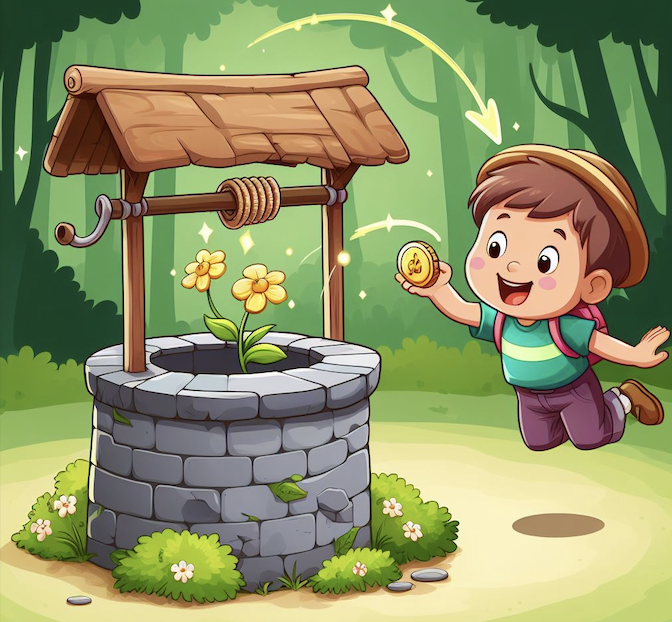

Il y a un puits magique profond dans une forêt qui a quelques nénuphars sur ses eaux. Vous avez un grand panier vide et quelques pièces de monnaie, et vous vous tenez à côté du puits. Vous avez plus de pièces que de nénuphars dans le puits. Le puits a pris note du fait que votre panier est vide. Si vous lancez une pièce dans le puits, le puits lancera un nénuphar dans votre panier. Si vous lancez quatre pièces à la fois dans le puits, le puits prendra note du nombre de nénuphars qu'il a lancés dans votre panier jusqu'à présent. Si vous lancez deux pièces à la fois dans le puits, le puits lancera autant de nénuphars dans votre panier qu'il avait pris note la dernière fois. Si vous lancez une pièce, ou deux pièces à la fois, dans le puits, et qu'il ne reste pas assez de nénuphars dans le puits, le puits ne lancera aucun nénuphar.
Étant donné $L$ le nombre de nénuphars dans le puits au début, retournez le nombre minimum de pièces que vous devrez lancer dans le puits pour qu'il lance tous ses nénuphars dans votre panier.

In [122]:
def min_well_coin(remaining_flowers, well_memory, n_coin_tossed):

    result = 0
    initial_flowers = remaining_flowers

    # Base case: If there are no remaining flowers, return the number of coins tossed
    if remaining_flowers == 0:
        return n_coin_tossed

    # if remaining_flowers != 0 and remaining_flowers >= well_memory:

    if n_coin_tossed == 0:
        # To start the process, spending 2 or 4 coins give us 0 flowers in the beginig and is not beneficial
        print(0, n_coin_tossed, well_memory)
        result = min_well_coin(remaining_flowers - 1, well_memory, n_coin_tossed + 1)

    elif n_coin_tossed == 1:
        print(1, n_coin_tossed, well_memory)
        # if you toss one coin, reduce the remaining flowers by 1 and increase n_coin_tossed by 1
        result = min_well_coin(remaining_flowers - 1, well_memory, n_coin_tossed + 1)

    elif n_coin_tossed == 4:
        print(4, n_coin_tossed, well_memory)
        well_memory = initial_flowers - remaining_flowers
        # if you toss four coins, well_memory is updated with number of lilys thrown to you
        result = min_well_coin(remaining_flowers, well_memory , n_coin_tossed + 4)

    if well_memory >= 6:         # spending 6 coins with 2-coin and 4-coin scenarios is only beneficial when we can get aleast more than 6 flowers with it compared to the trivial solution (only using sigle coin tosses)
    # if n_coin_tossed >= 2:
        print(2, n_coin_tossed)
        # if you toss two coins, reduce the remaining flowers by well_memory and increase n_coin_tossed by well_memory
        result = min_well_coin(remaining_flowers - well_memory, well_memory, n_coin_tossed + 2)

    return None

In [108]:
# Les asserts sont flexibles - seul le résultat compte. Modifiez à votre convenance.
assert min_well_coin(5, 0, 0) == 5
assert min_well_coin(20, 0, 0) == 15

0 0
1 1
1 2
1 3
1 4
0 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19


AssertionError: ignored

### Explications

<< A REMPLIR PAR L'ETUDIANT >>